####미세먼지(PM10) 월별 도시별 대기 오염도 & (날씨) 종관기상, 지점별 연-월 통계 & 질병관리청-만성질환건강통계 데이터 활용하기
* 우선 관심도와 접근성 높은 데이터를 선별, 이에 부합하는 가설을 아래와 같이 2가지 선정

### 가설검정1) 대기 오염이 높은 지역에서는 호흡기 질환 발생률이 높을 것이다.
* PM-10 은 입자의 크기가 10μm 미만인 먼지를 의미함
#### 1. 미세먼지 월별, 도시별 대기 오염도, 질병관리청-만성질환건강통계 에서 호흡기 질환 데이터 프레임 구성하기
* 전자는 https://kosis.kr/statHtml/statHtml.do?orgId=106&tblId=DT_106N_03_0200076&vw_cd=MT_ZTITLE&list_id=T_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE 에서 가져옴
* 후자는 https://chs.kdca.go.kr/cdhs/biz/pblcVis/details.do?ctgrSn=40 에서 xlsx 로 연도별 추출
* 두 개의 겹치는 연도 range 는 19년도 부터 21년도
#### 2. 데이터 전처리: 미세먼지 데이터와 건강 데이터를 정리하고 필요한 부분을 추출합니다. 결측치를 제거하는 행위를 포함!
#### 3. 평균 대기 오염 수준 계산: 도시별로 월별 미세먼지 수치를 평균 내어 지역별 연간 평균 오염도를 체크
* 이미 장소별 / 년&월 별 평균치 세팅되어 있는 데이터임
* 시각화를 통해 전체적으로 오염도가 어떻게 변화 했는지 체크해보기
#### 4. 건강 데이터와 결합: 대기 오염 데이터와 천식 유병률 데이터를 지역별로 연결합니다.
#### 5. 상관분석: 대기 오염도와 천식 유병률 간의 상관관계를 분석하여 가설을 검정합니다.

# 스토리텔링
## 코로나 19와 미세먼지 농도
  - 미세먼지 농도가 2020년에 상대적으로 낮아지는 추이를 보임.
  - 2019년 9월 코로나 19로 인해 중국 공장 셧다운이 원인이라고 예측
  - 미세먼지 농도 낮은 2020년에 천식, 비염 진료 건수가 낮은 것을 확인할 수 있다.
  - 즉, 미세먼지 농도는 호흡기 질환에 영향을 주고 상대적으로 비염보다 천식에 더 영향을 줄 수 있다고 예측해볼만 하다.

## 미세먼지 농도와 호흡기 질환과의 관계
  - 미세먼지 농도가 높은 2019년, 2021년에 호흡기 질환 진료건 수가 많음.
  - 반면에 미세먼지 농도가 상대적으로 낮은 2020년에는 호흡기 질환 진료건 수가 적음.
  - 미세먼지 농도와 천식 진료건 수의 상관계수가 0.39 이상, 비염 진료건 수와의 상관계수는 0.27 이상으로 어느 정도의 상관관계를 가지고 있다고 유추해볼 수 있다
  - 즉, 미세먼지 농도가 호흡기 질환에 직접적인 원인은 아닐 수 있지만. 직/간접적인 원인이 될 수 있다고 예측해볼만하다.

## 성별간의 호흡기 질환 발병 차이, 호흡기 질환 발병률을 낮추기 위한 방안 모색
 - 송파구의 호흡 질환 진료 건수가 많고, 특히, 여성이 남성보다 상대적으로 발병률이 높기 때문에 송파구에 호흡 질환 관련 의료 대체 방안 강구할 필요 있어보인다

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib
import koreanize_matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 미세먼지


In [ ]:
df_dust = pd.read_csv('/content/drive/MyDrive/data_lion_three/106_DT_106N_03_0200076_20241010172812.csv', encoding='cp949')
df_dust

,구분,항목,단위,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,...,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,Unnamed: 39
0,중구,월평균,NaN,60,53,62,35,44,23,26,...,47,67,36,28,23,13,27,46,38,NaN
1,종로구,월평균,NaN,60,51,61,35,44,24,25,...,43,63,32,22,21,13,26,46,39,NaN
2,중랑구,월평균,NaN,58,51,60,32,42,22,22,...,41,60,33,26,23,14,26,45,38,NaN
3,동대문구,월평균,NaN,61,54,63,33,42,22,22,...,41,63,35,24,21,14,27,45,39,NaN
4,은평구,월평균,NaN,64,57,70,44,57,31,26*,...,42,59,31,21,19,13,25,44,36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,우현동,월평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34*,29,18,23,20,27,39,36,NaN
639,반송로,월평균,NaN,45,57,55,46,53,39,NaN,...,34,34,28,21,21,17,23,31,28,NaN
640,김해대로,월평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18,25,35,31,NaN
641,시도평균,월평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18,24,33,30,NaN


In [ ]:
# 열은 기간, 행은 지역구로 구성되어 있음.
# 서울 지역이 아닌 다른 지역들 제거해서 서울 지역구만 남겨야겠다.
# 필요없는 열 단위, Unnamed:39 제거해야겠다.
# 결측치가 많아보이니 제거하거나 기간별 평균값으로 대체하는 방법 모색해야겠다.
print(df_dust.info())
print(df_dust.describe())
print(df_dust.columns)
print(df_dust.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   구분           643 non-null    object 
 1   항목           643 non-null    object 
 2   단위           0 non-null      float64
 3   2019.01 월    416 non-null    object 
 4   2019.02 월    431 non-null    object 
 5   2019.03 월    437 non-null    object 
 6   2019.04 월    439 non-null    object 
 7   2019.05 월    446 non-null    object 
 8   2019.06 월    447 non-null    object 
 9   2019.07 월    446 non-null    object 
 10  2019.08 월    448 non-null    object 
 11  2019.09 월    453 non-null    object 
 12  2019.10 월    457 non-null    object 
 13  2019.11 월    459 non-null    object 
 14  2019.12 월    467 non-null    object 
 15  2020.01 월    464 non-null    object 
 16  2020.02 월    461 non-null    object 
 17  2020.03 월    507 non-null    object 
 18  2020.04 월    511 non-null    object 
 19  2020.05 

https://github.com/userisjerry/24.08.datascience/blob/main/24_08_datascience(4mission).ipynb

## 미세먼지 데이터 전처리

In [ ]:
df_dust

,구분,항목,단위,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,...,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,Unnamed: 39
0,중구,월평균,NaN,60,53,62,35,44,23,26,...,47,67,36,28,23,13,27,46,38,NaN
1,종로구,월평균,NaN,60,51,61,35,44,24,25,...,43,63,32,22,21,13,26,46,39,NaN
2,중랑구,월평균,NaN,58,51,60,32,42,22,22,...,41,60,33,26,23,14,26,45,38,NaN
3,동대문구,월평균,NaN,61,54,63,33,42,22,22,...,41,63,35,24,21,14,27,45,39,NaN
4,은평구,월평균,NaN,64,57,70,44,57,31,26*,...,42,59,31,21,19,13,25,44,36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,우현동,월평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34*,29,18,23,20,27,39,36,NaN
639,반송로,월평균,NaN,45,57,55,46,53,39,NaN,...,34,34,28,21,21,17,23,31,28,NaN
640,김해대로,월평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18,25,35,31,NaN
641,시도평균,월평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18,24,33,30,NaN


In [ ]:
# 데이터를 확인해본 결과, 미세먼지 농도 수치에 '*','**' 표시 들어있음.
# 제거하고 수치형 변수로 변환해줘야겠다는 생각함.
# '*' 또는 '**'가 포함된 값들을 제거하고, 숫자로 변환

# 정규식에서 '*'를 처리하기 위해 '\*'를 사용
df_dust = df_dust.replace({'\*': '', '\*\*': ''}, regex=True)

# 숫자로 변환
df_dust.iloc[:, 1:] = df_dust.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_dust

,구분,항목,단위,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,...,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,Unnamed: 39
0,중구,NaN,NaN,60.0,53.0,62.0,35.0,44.0,23.0,26.0,...,47.0,67.0,36.0,28.0,23.0,13.0,27.0,46.0,38.0,NaN
1,종로구,NaN,NaN,60.0,51.0,61.0,35.0,44.0,24.0,25.0,...,43.0,63.0,32.0,22.0,21.0,13.0,26.0,46.0,39.0,NaN
2,중랑구,NaN,NaN,58.0,51.0,60.0,32.0,42.0,22.0,22.0,...,41.0,60.0,33.0,26.0,23.0,14.0,26.0,45.0,38.0,NaN
3,동대문구,NaN,NaN,61.0,54.0,63.0,33.0,42.0,22.0,22.0,...,41.0,63.0,35.0,24.0,21.0,14.0,27.0,45.0,39.0,NaN
4,은평구,NaN,NaN,64.0,57.0,70.0,44.0,57.0,31.0,26.0,...,42.0,59.0,31.0,21.0,19.0,13.0,25.0,44.0,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,우현동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34.0,29.0,18.0,23.0,20.0,27.0,39.0,36.0,NaN
639,반송로,NaN,NaN,45.0,57.0,55.0,46.0,53.0,39.0,NaN,...,34.0,34.0,28.0,21.0,21.0,17.0,23.0,31.0,28.0,NaN
640,김해대로,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,25.0,35.0,31.0,NaN
641,시도평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,24.0,33.0,30.0,NaN


In [ ]:
# 데이터에서 필요한 부분만 추출 (지역, 미세먼지 데이터, 날짜만 가져오기)
## 날짜는 다운받을때부터 2019.01~2023.12라서 신경쓸 필요없음
## 서울시 지역구만 뽑아내야겠다.

## 우선, 2열 항목, 3열 단위, 마지막 열 unnamed:39 지우기

df_dust = df_dust.drop(df_dust.columns[[1,2,-1]], axis=1)
## 이렇게도 쓸 수 있다
#df_col = list(df_dust.columns[:1]) + list(df_dust.columns[3:-1])
#df_dust = df_dust[df_col]



## 이제 끝에 '구'가 들어가는 행 빼고 다 지우면 되네
# '구' 글자가 포함된 행만 선택
df_dust = df_dust[df_dust['구분'].str.endswith('구')]
df_dust



,구분,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,...,2021.03 월,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월
0,중구,60.0,53.0,62.0,35.0,44.0,23.0,26.0,24.0,20.0,...,79.0,47.0,67.0,36.0,28.0,23.0,13.0,27.0,46.0,38.0
1,종로구,60.0,51.0,61.0,35.0,44.0,24.0,25.0,24.0,20.0,...,69.0,43.0,63.0,32.0,22.0,21.0,13.0,26.0,46.0,39.0
2,중랑구,58.0,51.0,60.0,32.0,42.0,22.0,22.0,21.0,14.0,...,65.0,41.0,60.0,33.0,26.0,23.0,14.0,26.0,45.0,38.0
3,동대문구,61.0,54.0,63.0,33.0,42.0,22.0,22.0,21.0,16.0,...,65.0,41.0,63.0,35.0,24.0,21.0,14.0,27.0,45.0,39.0
4,은평구,64.0,57.0,70.0,44.0,57.0,31.0,26.0,26.0,22.0,...,66.0,42.0,59.0,31.0,21.0,19.0,13.0,25.0,44.0,36.0
5,마포구,73.0,61.0,77.0,50.0,65.0,36.0,25.0,23.0,16.0,...,62.0,39.0,56.0,31.0,24.0,21.0,15.0,27.0,41.0,33.0
6,영등포구,70.0,60.0,76.0,52.0,64.0,37.0,26.0,24.0,22.0,...,66.0,39.0,57.0,33.0,25.0,22.0,16.0,28.0,46.0,38.0
7,동작구,64.0,59.0,68.0,39.0,48.0,29.0,30.0,30.0,29.0,...,69.0,44.0,64.0,36.0,27.0,25.0,17.0,29.0,47.0,43.0
8,관악구,72.0,63.0,76.0,48.0,62.0,35.0,26.0,24.0,NaN,...,61.0,38.0,57.0,33.0,25.0,22.0,15.0,26.0,42.0,36.0
9,강남구,61.0,54.0,64.0,34.0,43.0,24.0,29.0,29.0,24.0,...,64.0,40.0,60.0,34.0,26.0,22.0,14.0,26.0,42.0,36.0


In [ ]:
# 결측치 확인
df_dust.isnull().sum()

,0
구분,0
2019.01 월,0
2019.02 월,0
2019.03 월,0
2019.04 월,0
2019.05 월,0
2019.06 월,0
2019.07 월,0
2019.08 월,0
2019.09 월,1


In [ ]:
## 2019년 9월에 결측치가 하나 있다.
## 함수 사용해서 열을 통해 결측치를 찾아서
## 결측치가 있는 행의 바로 앞 열과 뒤 열의 mean으로 대체한다.

def nan_mean(df_dust) :
  for col in df_dust.columns :
    for i in range(1, len(df_dust)-1) :
      if pd.isnull(df_dust.loc[i, col]) :
        df_dust.loc[i, col] = (df_dust.loc[i-1, col] + df_dust.loc[i+1, col]) / 2
  return df_dust

df_dust = nan_mean(df_dust)
df_dust
# 함수 사용한 결과, 결측치였던 관악구 2019년 9월 데이터가 26.5 로 대체된 것을 확인할 수 있다.

,구분,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,...,2021.03 월,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월
0,중구,60.0,53.0,62.0,35.0,44.0,23.0,26.0,24.0,20.0,...,79.0,47.0,67.0,36.0,28.0,23.0,13.0,27.0,46.0,38.0
1,종로구,60.0,51.0,61.0,35.0,44.0,24.0,25.0,24.0,20.0,...,69.0,43.0,63.0,32.0,22.0,21.0,13.0,26.0,46.0,39.0
2,중랑구,58.0,51.0,60.0,32.0,42.0,22.0,22.0,21.0,14.0,...,65.0,41.0,60.0,33.0,26.0,23.0,14.0,26.0,45.0,38.0
3,동대문구,61.0,54.0,63.0,33.0,42.0,22.0,22.0,21.0,16.0,...,65.0,41.0,63.0,35.0,24.0,21.0,14.0,27.0,45.0,39.0
4,은평구,64.0,57.0,70.0,44.0,57.0,31.0,26.0,26.0,22.0,...,66.0,42.0,59.0,31.0,21.0,19.0,13.0,25.0,44.0,36.0
5,마포구,73.0,61.0,77.0,50.0,65.0,36.0,25.0,23.0,16.0,...,62.0,39.0,56.0,31.0,24.0,21.0,15.0,27.0,41.0,33.0
6,영등포구,70.0,60.0,76.0,52.0,64.0,37.0,26.0,24.0,22.0,...,66.0,39.0,57.0,33.0,25.0,22.0,16.0,28.0,46.0,38.0
7,동작구,64.0,59.0,68.0,39.0,48.0,29.0,30.0,30.0,29.0,...,69.0,44.0,64.0,36.0,27.0,25.0,17.0,29.0,47.0,43.0
8,관악구,72.0,63.0,76.0,48.0,62.0,35.0,26.0,24.0,26.5,...,61.0,38.0,57.0,33.0,25.0,22.0,15.0,26.0,42.0,36.0
9,강남구,61.0,54.0,64.0,34.0,43.0,24.0,29.0,29.0,24.0,...,64.0,40.0,60.0,34.0,26.0,22.0,14.0,26.0,42.0,36.0


In [ ]:
# 결측치 잘 처리했는지 확인
df_dust.isnull().sum().sum()

0

In [ ]:
# 데이터 변환, '구분 (지역)'을 기준으로 각 월별 데이터를 길게(long-form) 변환 > 즉, 행이 길어지는 형태로 바꿈
## 이렇게 하는 이유는 19년~21년 월별 미세먼지 농도 추이를 보기 위함.
df_dust_month = df_dust.melt(id_vars='구분', var_name='월', value_name='미세먼지 농도')
df_dust_month

,구분,월,미세먼지 농도
0,중구,2019.01 월,60.0
1,종로구,2019.01 월,60.0
2,중랑구,2019.01 월,58.0
3,동대문구,2019.01 월,61.0
4,은평구,2019.01 월,64.0
...,...,...,...
895,서초구,2021.12 월,36.0
896,강서구,2021.12 월,44.0
897,송파구,2021.12 월,38.0
898,양천구,2021.12 월,41.0


## 미세먼지 시각화

In [ ]:
# 2019~2021 연평균 열의 데이터 타입을 숫자형으로 변환
df_dust['2019 연평균'] = df_dust.loc[:, '2019.01 월':'2019.12 월'].mean(axis=1)  # .astype(float) 추가
df_dust['2020 연평균'] = df_dust.loc[:, '2020.01 월':'2020.12 월'].mean(axis=1)  # .astype(float) 추가
df_dust['2021 연평균'] = df_dust.loc[:, '2021.01 월':'2021.12 월'].mean(axis=1)  # .astype(float) 추가
df_dust_year = df_dust[['구분', '2019 연평균', '2020 연평균', '2021 연평균']]
df_dust_year

,구분,2019 연평균,2020 연평균,2021 연평균
0,중구,37.5,35.75,41.916667
1,종로구,37.5,35.833333,38.833333
2,중랑구,37.416667,35.25,37.833333
3,동대문구,38.5,32.5,38.0
4,은평구,41.916667,34.25,36.416667
5,마포구,45.833333,32.75,35.5
6,영등포구,44.333333,34.083333,37.583333
7,동작구,43.416667,39.833333,41.0
8,관악구,47.041667,34.916667,36.0
9,강남구,40.166667,32.0,36.916667


In [ ]:
## 아까처럼 연도별 미세먼지 평균을 long format으로 변환
df_dust_year_mean = pd.melt(df_dust_year, id_vars=['구분'], var_name='연도', value_name='미세먼지 평균 농도')
# 연도 추출
df_dust_year_mean['연도'] = df_dust_year_mean['연도'].str[:4].astype(int)
df_dust_year_mean

,구분,연도,미세먼지 평균 농도
0,중구,2019,37.5
1,종로구,2019,37.5
2,중랑구,2019,37.416667
3,동대문구,2019,38.5
4,은평구,2019,41.916667
...,...,...,...
70,서초구,2021,40.166667
71,강서구,2021,40.666667
72,송파구,2021,37.416667
73,양천구,2021,40.75


In [ ]:
## 구별로, 연도별로 /// 미세먼지평균 농도를 구함

df_dust_finalmonth = df_dust_year_mean.groupby(['구분', '연도'])['미세먼지 평균 농도'].mean().reset_index()
df_dust_finalmonth

,구분,연도,미세먼지 평균 농도
0,강남구,2019,40.166667
1,강남구,2020,32.0
2,강남구,2021,36.916667
3,강동구,2019,41.916667
4,강동구,2020,36.916667
...,...,...,...
70,중구,2020,35.75
71,중구,2021,41.916667
72,중랑구,2019,37.416667
73,중랑구,2020,35.25


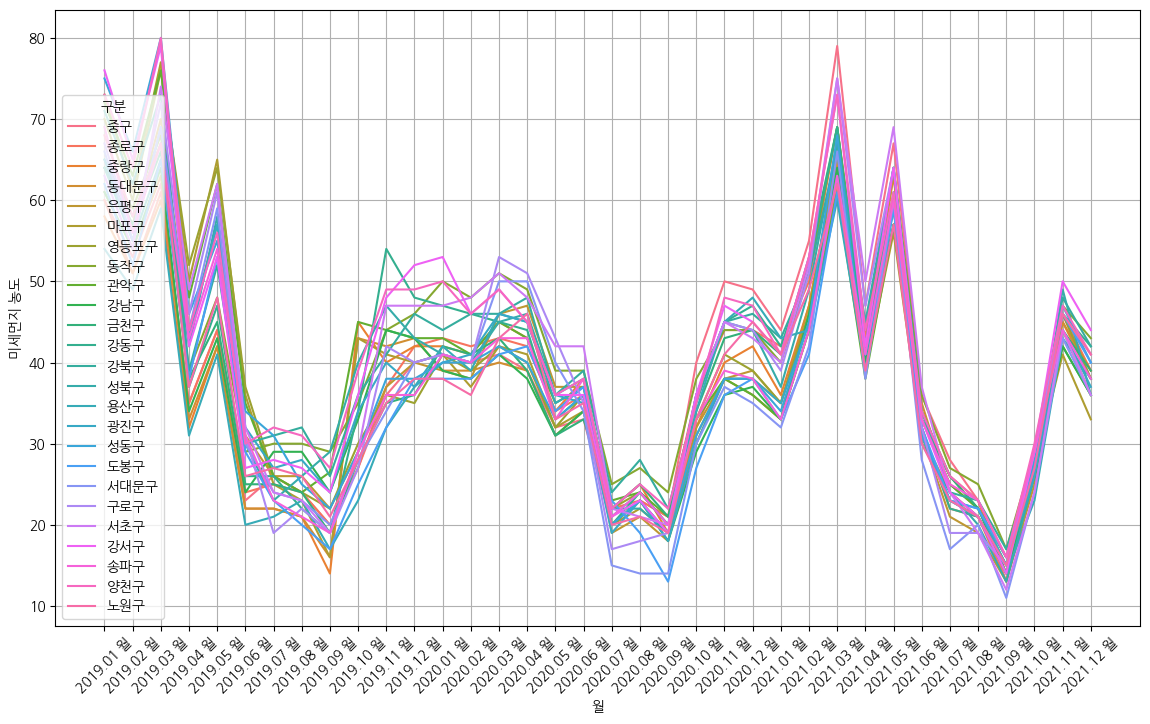

In [ ]:
# 전체 기간 동안의 변화 추이를 보기 위해 월별 데이터를 라인 차트로 표현
## 그래프 확인 결과, 2019년의 경우, 1,2,4월에 2020년은 2월, 3월에 2021년은 2,4월에 미세먼지 농도가 높음을 확인할 수 있다.
## 특이한 점은 2019년 4분기~ 2020년1분기 미세먼지 농도의 경우, 큰 폭으로 상승하지는 않았지만, 미세먼지 농도가 장기간 40~50 사이를 유지함
plt.figure(figsize=(14, 8))
sns.lineplot(df_dust_month, x='월', y='미세먼지 농도', hue='구분')

plt.xticks(rotation=45)
plt.grid(True)


In [ ]:
df_dust.head()

,구분,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,...,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2019 연평균,2020 연평균,2021 연평균
0,중구,60.0,53.0,62.0,35.0,44.0,23.0,26.0,24.0,20.0,...,36.0,28.0,23.0,13.0,27.0,46.0,38.0,37.5,35.75,41.916667
1,종로구,60.0,51.0,61.0,35.0,44.0,24.0,25.0,24.0,20.0,...,32.0,22.0,21.0,13.0,26.0,46.0,39.0,37.5,35.833333,38.833333
2,중랑구,58.0,51.0,60.0,32.0,42.0,22.0,22.0,21.0,14.0,...,33.0,26.0,23.0,14.0,26.0,45.0,38.0,37.416667,35.25,37.833333
3,동대문구,61.0,54.0,63.0,33.0,42.0,22.0,22.0,21.0,16.0,...,35.0,24.0,21.0,14.0,27.0,45.0,39.0,38.5,32.5,38.0
4,은평구,64.0,57.0,70.0,44.0,57.0,31.0,26.0,26.0,22.0,...,31.0,21.0,19.0,13.0,25.0,44.0,36.0,41.916667,34.25,36.416667


# 천식

In [ ]:
## 2006.01~2023.12 : 월별 외래환자(호흡기질환) 나이별 진료 건수
df_asthma= pd.read_csv('/content/drive/MyDrive/data_lion_three/국민건강보험공단_환경성질환(천식) 의료이용정보_20231231.csv')
df_asthma

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2006-01,11110,남자,1. 0-5세,203
1,2006-01,11110,남자,2. 6-11세,114
2,2006-01,11110,남자,3. 12-17세,21
3,2006-01,11110,남자,4. 18-44세,91
4,2006-01,11110,남자,5. 45-64세,127
...,...,...,...,...,...
639866,2023-12,51830,여자,2. 6-11세,3
639867,2023-12,51830,여자,3. 12-17세,1
639868,2023-12,51830,여자,4. 18-44세,8
639869,2023-12,51830,여자,5. 45-64세,8


In [ ]:
#datetime 형식으로 변환
df_asthma['요양개시연월'] = pd.to_datetime(df_asthma['요양개시연월'], format='%Y-%m')

## df_dust에서 제시한 기간을 골라냄
#2019-01 ~ 2021-12 기간에 해당하는 데이터
df_asthma = df_asthma[(df_asthma['요양개시연월'] >= '2019-01-01') & (df_asthma['요양개시연월'] <= '2021-12-31')]
df_asthma

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
464946,2019-01-01,11110,남자,1. 0-5세,12
464947,2019-01-01,11110,남자,2. 6-11세,14
464948,2019-01-01,11110,남자,3. 12-17세,7
464949,2019-01-01,11110,남자,4. 18-44세,59
464950,2019-01-01,11110,남자,5. 45-64세,51
...,...,...,...,...,...
569560,2021-12-01,51830,여자,2. 6-11세,2
569561,2021-12-01,51830,여자,3. 12-17세,1
569562,2021-12-01,51830,여자,4. 18-44세,5
569563,2021-12-01,51830,여자,5. 45-64세,6


In [ ]:
#서울의 주소 코드의 시작자리가 1이므로 주소 코드가 1로 시작하는것들만 남김
df_asthma = df_asthma[df_asthma['주소(시군구)'].astype(str).str.startswith('1')]
df_asthma

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
464946,2019-01-01,11110,남자,1. 0-5세,12
464947,2019-01-01,11110,남자,2. 6-11세,14
464948,2019-01-01,11110,남자,3. 12-17세,7
464949,2019-01-01,11110,남자,4. 18-44세,59
464950,2019-01-01,11110,남자,5. 45-64세,51
...,...,...,...,...,...
566963,2021-12-01,11740,여자,2. 6-11세,14
566964,2021-12-01,11740,여자,3. 12-17세,10
566965,2021-12-01,11740,여자,4. 18-44세,117
566966,2021-12-01,11740,여자,5. 45-64세,145


In [ ]:
#맵핑 주소 코드를 주소 명으로 변경하기 위한 데이터 프레임
mapping_df = pd.DataFrame({
    '시군구코드': [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290,
               11305, 11320, 11350, 11380, 11410, 11440, 11470, 11500,
               11530, 11545, 11560, 11590, 11620, 11650, 11680, 11710,
               11740],
    '시군구명': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
              '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구',
              '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구',
              '서초구', '강남구', '송파구', '강동구']
})
mapping_df

,시군구코드,시군구명
0,11110,종로구
1,11140,중구
2,11170,용산구
3,11200,성동구
4,11215,광진구
5,11230,동대문구
6,11260,중랑구
7,11290,성북구
8,11305,강북구
9,11320,도봉구


In [ ]:
#맵핑 적용
df_asthma['주소(시군구)'] = df_asthma['주소(시군구)'].replace(mapping_df.set_index('시군구코드')['시군구명'])
df_asthma

<ipython-input-22-4ea15da79949>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asthma['주소(시군구)'] = df_asthma['주소(시군구)'].replace(mapping_df.set_index('시군구코드')['시군구명'])


,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
464946,2019-01-01,종로구,남자,1. 0-5세,12
464947,2019-01-01,종로구,남자,2. 6-11세,14
464948,2019-01-01,종로구,남자,3. 12-17세,7
464949,2019-01-01,종로구,남자,4. 18-44세,59
464950,2019-01-01,종로구,남자,5. 45-64세,51
...,...,...,...,...,...
566963,2021-12-01,강동구,여자,2. 6-11세,14
566964,2021-12-01,강동구,여자,3. 12-17세,10
566965,2021-12-01,강동구,여자,4. 18-44세,117
566966,2021-12-01,강동구,여자,5. 45-64세,145


In [ ]:
#인덱스 초기화
df_asthma.reset_index(drop=True, inplace=True)
df_asthma

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2019-01-01,종로구,남자,1. 0-5세,12
1,2019-01-01,종로구,남자,2. 6-11세,14
2,2019-01-01,종로구,남자,3. 12-17세,7
3,2019-01-01,종로구,남자,4. 18-44세,59
4,2019-01-01,종로구,남자,5. 45-64세,51
...,...,...,...,...,...
10779,2021-12-01,강동구,여자,2. 6-11세,14
10780,2021-12-01,강동구,여자,3. 12-17세,10
10781,2021-12-01,강동구,여자,4. 18-44세,117
10782,2021-12-01,강동구,여자,5. 45-64세,145


## 미세먼지, 천식 merge

In [ ]:
df_human2 = df_asthma[(df_asthma["성별"] == "남자") | (df_asthma["성별"] == "여자")]
df_human2

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2019-01-01,종로구,남자,1. 0-5세,12
1,2019-01-01,종로구,남자,2. 6-11세,14
2,2019-01-01,종로구,남자,3. 12-17세,7
3,2019-01-01,종로구,남자,4. 18-44세,59
4,2019-01-01,종로구,남자,5. 45-64세,51
...,...,...,...,...,...
10779,2021-12-01,강동구,여자,2. 6-11세,14
10780,2021-12-01,강동구,여자,3. 12-17세,10
10781,2021-12-01,강동구,여자,4. 18-44세,117
10782,2021-12-01,강동구,여자,5. 45-64세,145


In [ ]:
# df_dust_finalmonth의 '연도' 컬럼을 정수형으로 변환
df_dust_finalmonth['연도'] = df_dust_finalmonth['연도'].astype(int)

# 데이터프레임 병합
df_human2['연도'] = pd.to_datetime(df_human2['요양개시연월']).dt.year
merged_df2 = pd.merge(df_dust_finalmonth, df_human2, left_on='연도', right_on='연도', how='left')
merged_df2

,구분,연도,미세먼지 평균 농도,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,강남구,2019,40.166667,2019-01-01,종로구,남자,1. 0-5세,12
1,강남구,2019,40.166667,2019-01-01,종로구,남자,2. 6-11세,14
2,강남구,2019,40.166667,2019-01-01,종로구,남자,3. 12-17세,7
3,강남구,2019,40.166667,2019-01-01,종로구,남자,4. 18-44세,59
4,강남구,2019,40.166667,2019-01-01,종로구,남자,5. 45-64세,51
...,...,...,...,...,...,...,...,...
269595,중랑구,2021,37.833333,2021-12-01,강동구,여자,2. 6-11세,14
269596,중랑구,2021,37.833333,2021-12-01,강동구,여자,3. 12-17세,10
269597,중랑구,2021,37.833333,2021-12-01,강동구,여자,4. 18-44세,117
269598,중랑구,2021,37.833333,2021-12-01,강동구,여자,5. 45-64세,145


In [ ]:
df_human2['연도'] = pd.to_datetime(df_human2['요양개시연월']).dt.year
merged_df2 = pd.merge(df_dust_finalmonth, df_human2, left_on='연도', right_on='연도', how='left')
merged_df2

,구분,연도,미세먼지 평균 농도,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,강남구,2019,40.166667,2019-01-01,종로구,남자,1. 0-5세,12
1,강남구,2019,40.166667,2019-01-01,종로구,남자,2. 6-11세,14
2,강남구,2019,40.166667,2019-01-01,종로구,남자,3. 12-17세,7
3,강남구,2019,40.166667,2019-01-01,종로구,남자,4. 18-44세,59
4,강남구,2019,40.166667,2019-01-01,종로구,남자,5. 45-64세,51
...,...,...,...,...,...,...,...,...
269595,중랑구,2021,37.833333,2021-12-01,강동구,여자,2. 6-11세,14
269596,중랑구,2021,37.833333,2021-12-01,강동구,여자,3. 12-17세,10
269597,중랑구,2021,37.833333,2021-12-01,강동구,여자,4. 18-44세,117
269598,중랑구,2021,37.833333,2021-12-01,강동구,여자,5. 45-64세,145


## 미세먼지, 천식 시각화

Text(0.5, 1.0, '연도별 성별 조사건수')

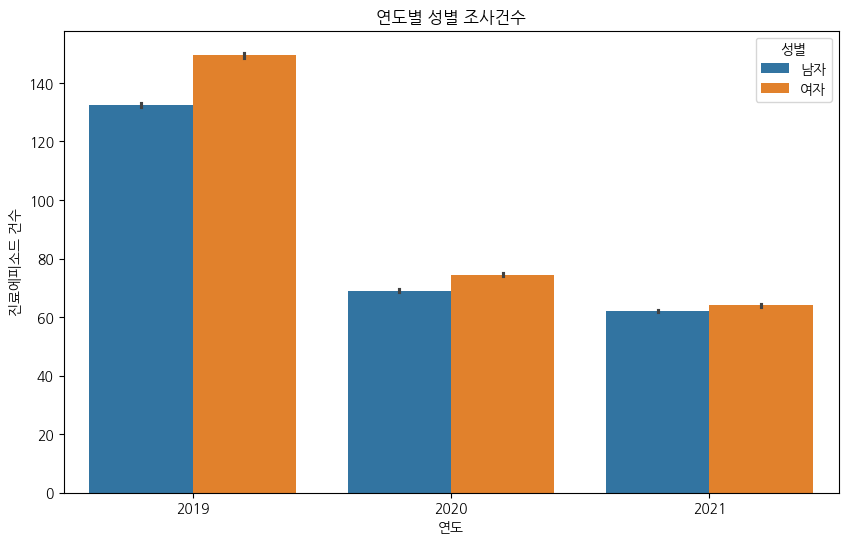

In [ ]:
# 연도별 평균 미세먼지 농도와 성별에 따른 조사건수
## 대체로 남자에 비해 여자의 진료 건수가 많음을 확인할 수 있다.
## 2020년부터는 전체적인 진료건수가 줄어듦을 확인할 수 있음.
## 2019년에 진료건수가 많았던 이유 탐색 > (ex.중국발 미세먼지 or 2020년부터 다양한 미세먼지 정책 수립)

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df2, x="연도", y="진료에피소드 건수", hue="성별")
plt.title("연도별 성별 조사건수")

Text(0.5, 1.0, '미세먼지 평균 농도와 조사건수의 관계')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


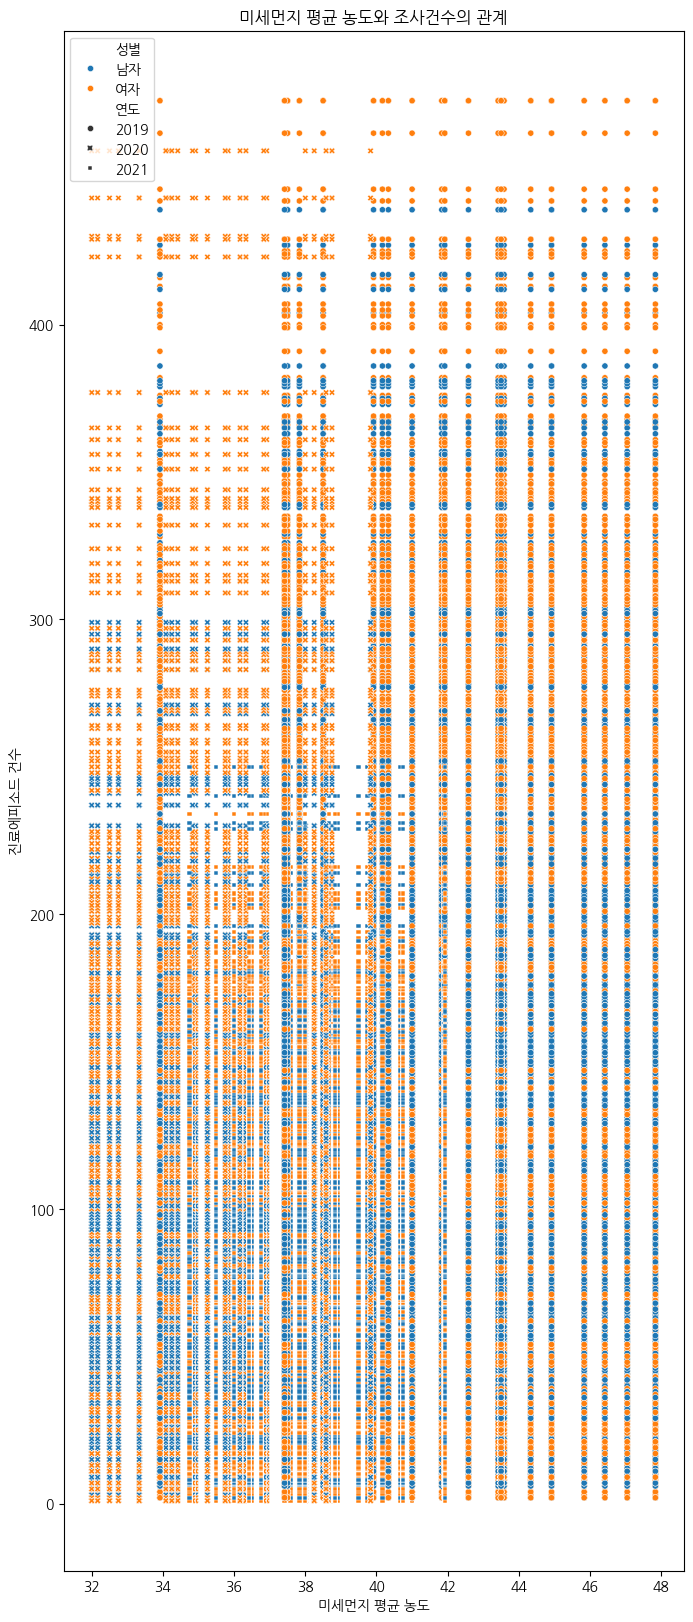

In [ ]:
# 평균 미세먼지 농도와 천식 조사건수의 관계
plt.figure(figsize=(8, 20))
sns.scatterplot(data=merged_df2, x="미세먼지 평균 농도", y="진료에피소드 건수", hue="성별", style="연도", s=20)
plt.title("미세먼지 평균 농도와 조사건수의 관계")

## 미세먼지 농도와 진료 건수가 관련이 있나?
## 농도가 높다고 진료 건수가 많긴 하지만, 농도가 낮을 때도 진료 건수가 꽤 있음.

In [ ]:
# 상관관계 계산
correlation_matrix2 = merged_df2[["미세먼지 평균 농도", "진료에피소드 건수"]].corr()
correlation_matrix2
## 두 변수간 상관계수를 봤을 때, 0.3 이상으로 비염보다는 높은 상관계수 있음

,미세먼지 평균 농도,진료에피소드 건수
미세먼지 평균 농도,1.000000,0.278834
진료에피소드 건수,0.278834,1.000000


<Axes: >

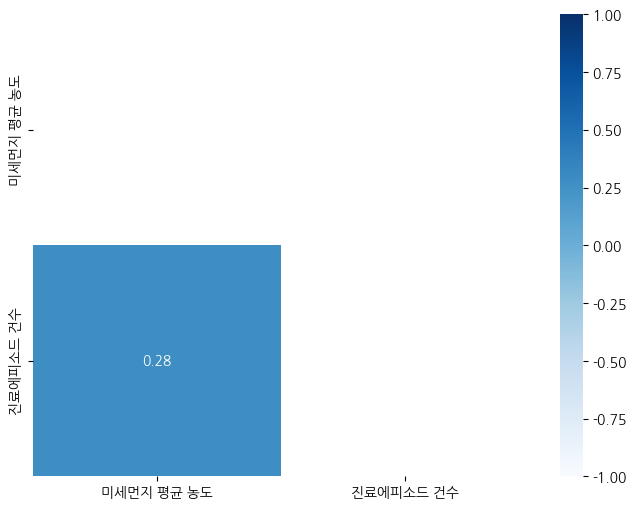

In [ ]:
# 상관 관계 시각화
# 왼쪽 아래만 (대각선 기준) 나오게 masking

mask = np.triu(np.ones_like(correlation_matrix2, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap="Blues", mask=mask, vmax=1.0, vmin=-1.0)


##월별 천식 평균진료건수

In [ ]:
# 기간별로 더 자세히 보기 위해 월별 천식, 진료건수 살펴봄
# 요양개시연월 열을 기준으로 데이터를 그룹화
# 월별 평균 진료 건수 계산
merged_df2_month = merged_df2.groupby(pd.Grouper(key='요양개시연월', freq='M'))
month_avg2 = merged_df2_month['진료에피소드 건수'].mean()
month_avg2

<ipython-input-31-2b961bb6dd0c>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged_df2_month = merged_df2.groupby(pd.Grouper(key='요양개시연월', freq='M'))


,진료에피소드 건수
요양개시연월,
2019-01-31,139.666667
2019-02-28,112.713333
2019-03-31,151.646667
2019-04-30,174.480000
2019-05-31,164.993333
2019-06-30,112.300000
2019-07-31,107.646667
2019-08-31,104.890000
2019-09-30,141.260000


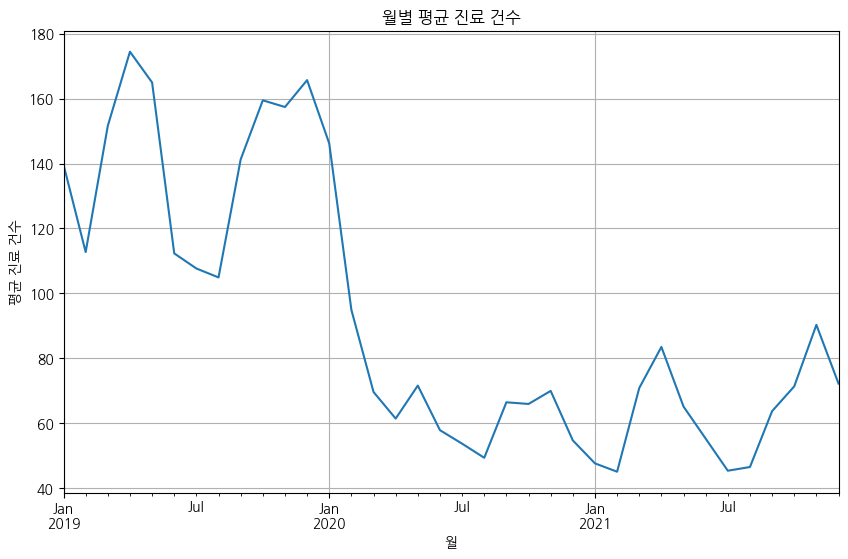

In [ ]:
# 월별 천식 평균 진료 건수 그래프
month_avg2.plot(kind='line', figsize=(10, 6))
plt.title('월별 평균 진료 건수')
plt.xlabel('월')
plt.ylabel('평균 진료 건수')
plt.grid(True)
plt.show()
## 2020년도에 진료건수가 적음을 알 수 있다. > 미세먼지 평균 농도가 2020년에 낮아서 그런 건가? > 코로나 19 이슈 중국 공장 셧다운과 연관 지을 수 있나

In [ ]:
# 월별 천식 진료 건수 집계
monthly_medical2 = df_asthma.groupby(pd.Grouper(key='요양개시연월', freq='M'))['진료에피소드 건수'].sum().reset_index()

# monthly_medical2 의 '요양개시연월' 열을 '월'로 변환
monthly_medical2['월'] = monthly_medical2['요양개시연월'].dt.strftime('%Y.%m 월')

# 월별 평균 미세먼지 농도 집계
monthly_dust_avg = df_dust_month.groupby('월')['미세먼지 농도'].mean().reset_index()

# 두 데이터프레임 병합
merged_monthly_data2 = pd.merge(monthly_medical2, monthly_dust_avg, on='월', how='left')
merged_monthly_data2

<ipython-input-33-72d985450edd>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_medical2 = df_asthma.groupby(pd.Grouper(key='요양개시연월', freq='M'))['진료에피소드 건수'].sum().reset_index()


,요양개시연월,진료에피소드 건수,월,미세먼지 농도
0,2019-01-31,41900,2019.01 월,65.8
1,2019-02-28,33814,2019.02 월,57.0
2,2019-03-31,45494,2019.03 월,69.16
3,2019-04-30,52344,2019.04 월,40.84
4,2019-05-31,49498,2019.05 월,52.48
5,2019-06-30,33690,2019.06 월,28.64
6,2019-07-31,32294,2019.07 월,25.64
7,2019-08-31,31467,2019.08 월,24.76
8,2019-09-30,42378,2019.09 월,21.26
9,2019-10-31,47849,2019.10 월,32.88


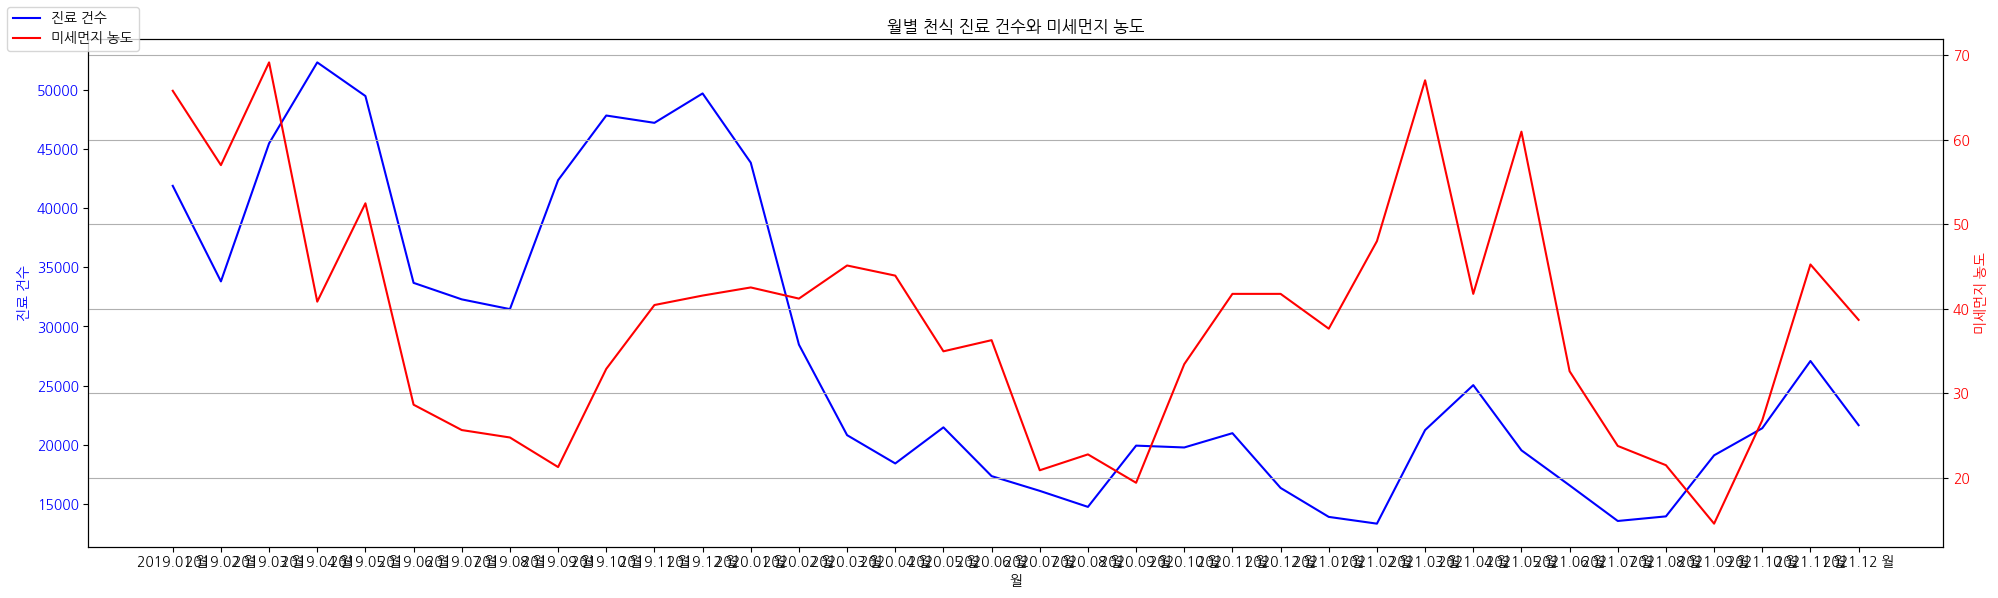

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 6))

# 진료 건수 (왼쪽 y축)
ax1.plot(merged_monthly_data2['월'], merged_monthly_data2['진료에피소드 건수'], color='blue', label='진료 건수')
ax1.set_xlabel('월')
ax1.set_ylabel('진료 건수', color='blue')
ax1.tick_params('y', labelcolor='blue')

# 미세먼지 농도 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(merged_monthly_data2['월'], merged_monthly_data2['미세먼지 농도'], color='red', label='미세먼지 농도')
ax2.set_ylabel('미세먼지 농도', color='red')
ax2.tick_params('y', labelcolor='red')

# x축 눈금 회전
plt.xticks(rotation=90)

# 범례 표시
fig.legend(loc='upper left')

plt.title('월별 천식 진료 건수와 미세먼지 농도')
plt.grid(True)
plt.tight_layout()
plt.show()
# 미세먼지가 높을때 진료 건수가 많아진다는 사실을 확인할 수 있다.
# 하지만, 미세먼지 농도가 낮을 때도 진료 건수가 많은 경우도 있음.

In [ ]:
# 주소와 진료 건수 그룹화
tmp2 = merged_df2.groupby("주소(시군구)")["진료에피소드 건수"].sum()
tmp2 = tmp2.reset_index()
tmp2

,주소(시군구),진료에피소드 건수
0,강남구,1258150
1,강동구,1097900
2,강북구,928650
3,강서구,1375350
4,관악구,1098300
5,광진구,964325
6,구로구,980175
7,금천구,412125
8,노원구,1290400
9,도봉구,910425


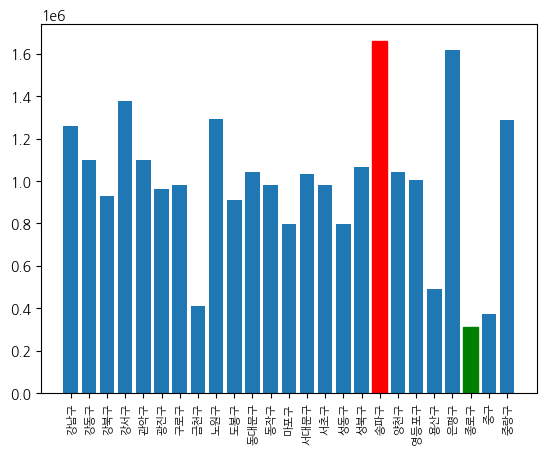

In [ ]:
# 주소와 진료건수 차트 > 송파구가 진료건수가 가장 많고 중구가 가장 적음

ax_params = {
    "x": tmp2["주소(시군구)"],
    "height": tmp2["진료에피소드 건수"],

}

fig, ax = plt.subplots()
bars = ax.bar(**ax_params)

# 진료 건수 값 최대/최소 인덱스 찾기
heights = tmp2["진료에피소드 건수"].values
max_idx = np.argmax(heights)
min_idx = np.argmin(heights)

# 최대/최소 값에 해당하는 bar의 색상 변경
bars[max_idx].set_color('red')
bars[min_idx].set_color('green')

# x축 글자 크기 조절 및 회전
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [ ]:
merged_df2.head()

,구분,연도,미세먼지 평균 농도,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,강남구,2019,40.166667,2019-01-01,종로구,남자,1. 0-5세,12
1,강남구,2019,40.166667,2019-01-01,종로구,남자,2. 6-11세,14
2,강남구,2019,40.166667,2019-01-01,종로구,남자,3. 12-17세,7
3,강남구,2019,40.166667,2019-01-01,종로구,남자,4. 18-44세,59
4,강남구,2019,40.166667,2019-01-01,종로구,남자,5. 45-64세,51


#비염

In [ ]:
#비염 불러오기
df_rhinitis = pd.read_csv('/content/drive/MyDrive/data_lion_three/국민건강보험공단_환경성질환(비염) 의료이용정보_20231231.csv')
df_rhinitis

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2006-01,11110,남자,1. 0-5세,283
1,2006-01,11110,남자,2. 6-11세,385
2,2006-01,11110,남자,3. 12-17세,288
3,2006-01,11110,남자,4. 18-44세,828
4,2006-01,11110,남자,5. 45-64세,592
...,...,...,...,...,...
647941,2023-12,51830,여자,2. 6-11세,34
647942,2023-12,51830,여자,3. 12-17세,33
647943,2023-12,51830,여자,4. 18-44세,152
647944,2023-12,51830,여자,5. 45-64세,185


In [ ]:
#date time 형식으로 변환
df_rhinitis['요양개시연월'] = pd.to_datetime(df_rhinitis['요양개시연월'], format='%Y-%m')
df_rhinitis

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2006-01-01,11110,남자,1. 0-5세,283
1,2006-01-01,11110,남자,2. 6-11세,385
2,2006-01-01,11110,남자,3. 12-17세,288
3,2006-01-01,11110,남자,4. 18-44세,828
4,2006-01-01,11110,남자,5. 45-64세,592
...,...,...,...,...,...
647941,2023-12-01,51830,여자,2. 6-11세,34
647942,2023-12-01,51830,여자,3. 12-17세,33
647943,2023-12-01,51830,여자,4. 18-44세,152
647944,2023-12-01,51830,여자,5. 45-64세,185


In [ ]:
## df_dust에서 제시한 기간을 골라냄
#2019-01 ~ 2021-12 기간에 해당하는 데이터
df_rhinitis = df_rhinitis[(df_rhinitis['요양개시연월'] >= '2019-01-01') & (df_rhinitis['요양개시연월'] <= '2021-12-31')]
df_rhinitis


,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
467985,2019-01-01,11110,남자,1. 0-5세,120
467986,2019-01-01,11110,남자,2. 6-11세,157
467987,2019-01-01,11110,남자,3. 12-17세,128
467988,2019-01-01,11110,남자,4. 18-44세,780
467989,2019-01-01,11110,남자,5. 45-64세,703
...,...,...,...,...,...
575958,2021-12-01,51830,여자,2. 6-11세,23
575959,2021-12-01,51830,여자,3. 12-17세,13
575960,2021-12-01,51830,여자,4. 18-44세,54
575961,2021-12-01,51830,여자,5. 45-64세,72


In [ ]:
#서울의 주소 코드의 시작자리가 1이므로 주소 코드가 1로 시작하는것들만 남김
df_rhinitis = df_rhinitis[df_rhinitis['주소(시군구)'].astype(str).str.startswith('1')]
df_rhinitis

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
467985,2019-01-01,11110,남자,1. 0-5세,120
467986,2019-01-01,11110,남자,2. 6-11세,157
467987,2019-01-01,11110,남자,3. 12-17세,128
467988,2019-01-01,11110,남자,4. 18-44세,780
467989,2019-01-01,11110,남자,5. 45-64세,703
...,...,...,...,...,...
573259,2021-12-01,11740,여자,2. 6-11세,642
573260,2021-12-01,11740,여자,3. 12-17세,357
573261,2021-12-01,11740,여자,4. 18-44세,2319
573262,2021-12-01,11740,여자,5. 45-64세,1675


In [ ]:
#맵핑 주소 코드를 주소 명으로 변경하기 위한 데이터 프레임
mapping_df = pd.DataFrame({
    '시군구코드': [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290,
               11305, 11320, 11350, 11380, 11410, 11440, 11470, 11500,
               11530, 11545, 11560, 11590, 11620, 11650, 11680, 11710,
               11740],
    '시군구명': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
              '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구',
              '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구',
              '서초구', '강남구', '송파구', '강동구']
})
mapping_df

,시군구코드,시군구명
0,11110,종로구
1,11140,중구
2,11170,용산구
3,11200,성동구
4,11215,광진구
5,11230,동대문구
6,11260,중랑구
7,11290,성북구
8,11305,강북구
9,11320,도봉구


In [ ]:
## 비염을 천식과 동일한 맵핑 적용시켜서
## 주소를 숫자에서 한글로 바꿔준다.
df_rhinitis['주소(시군구)'] = df_rhinitis['주소(시군구)'].replace(mapping_df.set_index('시군구코드')['시군구명'])
df_rhinitis

<ipython-input-43-25d2b379e356>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rhinitis['주소(시군구)'] = df_rhinitis['주소(시군구)'].replace(mapping_df.set_index('시군구코드')['시군구명'])


,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
467985,2019-01-01,종로구,남자,1. 0-5세,120
467986,2019-01-01,종로구,남자,2. 6-11세,157
467987,2019-01-01,종로구,남자,3. 12-17세,128
467988,2019-01-01,종로구,남자,4. 18-44세,780
467989,2019-01-01,종로구,남자,5. 45-64세,703
...,...,...,...,...,...
573259,2021-12-01,강동구,여자,2. 6-11세,642
573260,2021-12-01,강동구,여자,3. 12-17세,357
573261,2021-12-01,강동구,여자,4. 18-44세,2319
573262,2021-12-01,강동구,여자,5. 45-64세,1675


1. 비염을 '구'로 끝나는 것의 '연평균' 농도 값 데이터 프레임 구성
2. '구' 단위로 // 남성, 여성 값으로 데이터 프레임 구성
3. 1번 2번의 상관관계 비교

In [ ]:
#인덱스 초기화
df_rhinitis.reset_index(drop=True, inplace=True)
df_rhinitis

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2019-01-01,종로구,남자,1. 0-5세,120
1,2019-01-01,종로구,남자,2. 6-11세,157
2,2019-01-01,종로구,남자,3. 12-17세,128
3,2019-01-01,종로구,남자,4. 18-44세,780
4,2019-01-01,종로구,남자,5. 45-64세,703
...,...,...,...,...,...
10795,2021-12-01,강동구,여자,2. 6-11세,642
10796,2021-12-01,강동구,여자,3. 12-17세,357
10797,2021-12-01,강동구,여자,4. 18-44세,2319
10798,2021-12-01,강동구,여자,5. 45-64세,1675


In [ ]:
# 각 지역구 2019년~2021년 미세먼지 농도 평균
## 2019년 가장높은 지역구(높은순으로): 47.83
df_dust['2019 연평균'] = df_dust.loc[:, '2019.01 월':'2019.12 월'].mean(axis=1)
df_dust['2020 연평균'] = df_dust.loc[:, '2020.01 월':'2020.12 월'].mean(axis=1)
df_dust['2021 연평균'] = df_dust.loc[:, '2021.01 월':'2021.12 월'].mean(axis=1)

df_dust_year = df_dust[['구분', '2019 연평균', '2020 연평균', '2021 연평균']]
df_dust_year

,구분,2019 연평균,2020 연평균,2021 연평균
0,중구,37.5,35.75,41.916667
1,종로구,37.5,35.833333,38.833333
2,중랑구,37.416667,35.25,37.833333
3,동대문구,38.5,32.5,38.0
4,은평구,41.916667,34.25,36.416667
5,마포구,45.833333,32.75,35.5
6,영등포구,44.333333,34.083333,37.583333
7,동작구,43.416667,39.833333,41.0
8,관악구,47.041667,34.916667,36.0
9,강남구,40.166667,32.0,36.916667


In [ ]:
## 아까처럼 연도별 미세먼지 평균을 long format으로 변환
df_dust_year_mean = pd.melt(df_dust_year, id_vars=['구분'], var_name='연도', value_name='미세먼지 평균 농도')
# 연도 추출
df_dust_year_mean['연도'] = df_dust_year_mean['연도'].str[:4].astype(int)
df_dust_year_mean

,구분,연도,미세먼지 평균 농도
0,중구,2019,37.5
1,종로구,2019,37.5
2,중랑구,2019,37.416667
3,동대문구,2019,38.5
4,은평구,2019,41.916667
...,...,...,...
70,서초구,2021,40.166667
71,강서구,2021,40.666667
72,송파구,2021,37.416667
73,양천구,2021,40.75


In [ ]:
## 구별로, 연도별로 /// 미세먼지평균 농도를 구함

df_dust_finalmonth = df_dust_year_mean.groupby(['구분', '연도'])['미세먼지 평균 농도'].mean().reset_index()
df_dust_finalmonth

,구분,연도,미세먼지 평균 농도
0,강남구,2019,40.166667
1,강남구,2020,32.0
2,강남구,2021,36.916667
3,강동구,2019,41.916667
4,강동구,2020,36.916667
...,...,...,...
70,중구,2020,35.75
71,중구,2021,41.916667
72,중랑구,2019,37.416667
73,중랑구,2020,35.25


In [ ]:
## 연도별로(구 상관없이) 미세먼지농도 평균을 구해보자

df_dust_finalmonth = df_dust_year_mean.groupby('연도')['미세먼지 평균 농도'].mean().reset_index()
df_dust_finalmonth

,연도,미세먼지 평균 농도
0,2019,41.705
1,2020,35.333333
2,2021,38.21


In [ ]:
# 성별과 지역구 별로 진료 건수 알아보자
df_human = df_rhinitis[(df_rhinitis["성별"] == "남자") | (df_rhinitis["성별"] == "여자")]
df_human

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2019-01-01,종로구,남자,1. 0-5세,120
1,2019-01-01,종로구,남자,2. 6-11세,157
2,2019-01-01,종로구,남자,3. 12-17세,128
3,2019-01-01,종로구,남자,4. 18-44세,780
4,2019-01-01,종로구,남자,5. 45-64세,703
...,...,...,...,...,...
10795,2021-12-01,강동구,여자,2. 6-11세,642
10796,2021-12-01,강동구,여자,3. 12-17세,357
10797,2021-12-01,강동구,여자,4. 18-44세,2319
10798,2021-12-01,강동구,여자,5. 45-64세,1675


In [ ]:
df_human['요양개시연월'].dtype

dtype('<M8[ns]')

## 미세먼지, 비염 merge

In [ ]:
# 미세먼지 평균 농도로 정리한 데이터와 비염 진료 건수를 merge 해보자
df_human['연도'] = pd.to_datetime(df_human['요양개시연월']).dt.year
merged_df = pd.merge(df_dust_finalmonth, df_human, left_on='연도', right_on='연도', how='left')
merged_df

,연도,미세먼지 평균 농도,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2019,41.705,2019-01-01,종로구,남자,1. 0-5세,120
1,2019,41.705,2019-01-01,종로구,남자,2. 6-11세,157
2,2019,41.705,2019-01-01,종로구,남자,3. 12-17세,128
3,2019,41.705,2019-01-01,종로구,남자,4. 18-44세,780
4,2019,41.705,2019-01-01,종로구,남자,5. 45-64세,703
...,...,...,...,...,...,...,...
10795,2021,38.21,2021-12-01,강동구,여자,2. 6-11세,642
10796,2021,38.21,2021-12-01,강동구,여자,3. 12-17세,357
10797,2021,38.21,2021-12-01,강동구,여자,4. 18-44세,2319
10798,2021,38.21,2021-12-01,강동구,여자,5. 45-64세,1675


In [ ]:
merged_df_tb = merged_df[['연도', '미세먼지 평균 농도', '주소(시군구)', '성별', '진료에피소드 건수']]
merged_df_tb

,연도,미세먼지 평균 농도,주소(시군구),성별,진료에피소드 건수
0,2019,41.705,종로구,남자,120
1,2019,41.705,종로구,남자,157
2,2019,41.705,종로구,남자,128
3,2019,41.705,종로구,남자,780
4,2019,41.705,종로구,남자,703
...,...,...,...,...,...
10795,2021,38.21,강동구,여자,642
10796,2021,38.21,강동구,여자,357
10797,2021,38.21,강동구,여자,2319
10798,2021,38.21,강동구,여자,1675


In [ ]:
merged_df_tb.to_csv('merged_df_tb.csv', index=False)
print("CSV 파일이 저장되었습니다!")

CSV 파일이 저장되었습니다!


In [ ]:
from google.colab import files
files.download('/content/merged_df_tb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 미세먼지, 비염 시각화

Text(0.5, 1.0, '연도별 성별 조사건수')

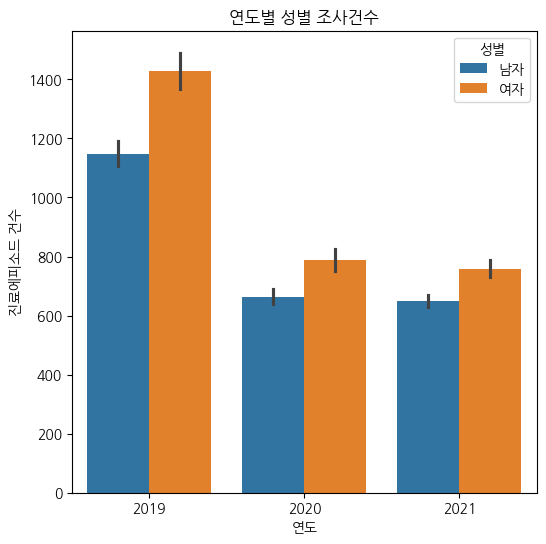

In [ ]:
# 연도별 평균 미세먼지 농도와 성별에 따른 조사건수
## 대체로 남자에 비해 여자의 진료 건수가 많음을 확인할 수 있다.
## 2020년부터는 전체적인 진료건수가 줄어듦을 확인할 수 있음.
## 2019년에 진료건수가 많았던 이유 탐색 > (ex.중국발 미세먼지 or 2020년부터 다양한 미세먼지 정책 수립)

plt.figure(figsize=(6,6))
sns.barplot(data=merged_df, x="연도", y="진료에피소드 건수", hue="성별")
plt.title("연도별 성별 조사건수")

Text(0.5, 1.0, '미세먼지 평균 농도와 조사건수의 관계')

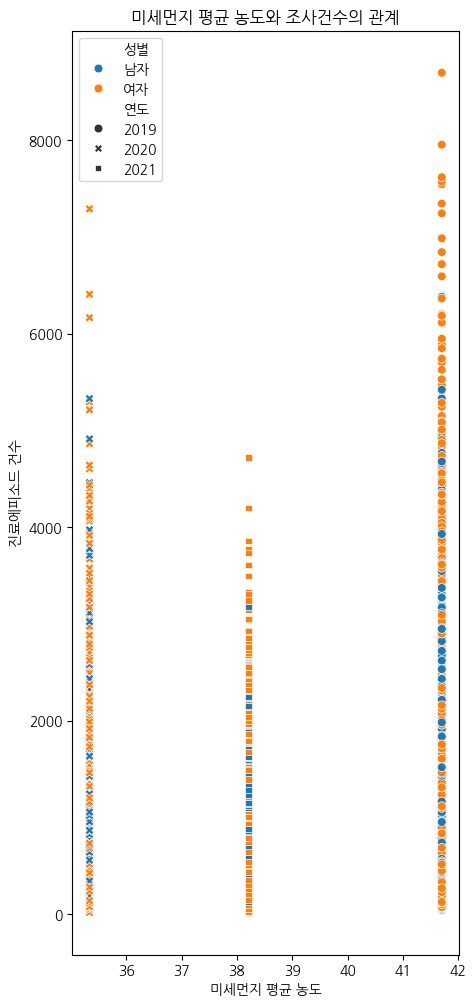

In [ ]:
# 평균 미세먼지 농도와 조사건수의 관계
plt.figure(figsize=(5, 12))
sns.scatterplot(data=merged_df, x="미세먼지 평균 농도", y="진료에피소드 건수", hue="성별", style="연도", s=40)
plt.title("미세먼지 평균 농도와 조사건수의 관계")

## 미세먼지 농도와 진료 건수가 관련이 있나?
## 농도가 높다고 진료 건수가 많긴 하지만, 농도가 낮을 때도 진료 건수가 꽤 있음.
## scatter 말고도 다른걸로 조금 정확히 봐야할 것 같은데

In [ ]:
# 상관관계 계산
correlation_matrix = merged_df[["미세먼지 평균 농도", "진료에피소드 건수"]].corr()
correlation_matrix
## 두 변수간 상관계수를 봤을 때, 0.3 이하로 약한 상관관계가 있음.

,미세먼지 평균 농도,진료에피소드 건수
미세먼지 평균 농도,1.00000,0.27245
진료에피소드 건수,0.27245,1.00000


<Axes: >

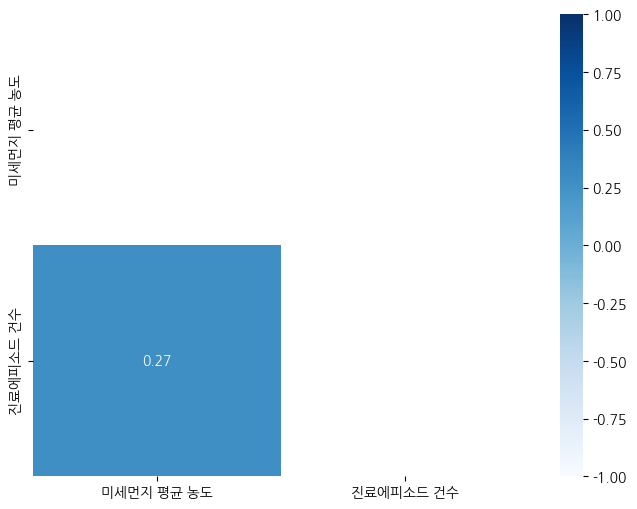

In [ ]:
# 상관 관계 시각화
# 왼쪽 아래만 (대각선 기준) 나오게 masking

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", mask=mask, vmax=1.0, vmin=-1.0)



## 월별 비염 평균 진료건수

In [ ]:
# 요양개시연월 열을 기준으로 데이터를 그룹화
# 월별 평균 진료 건수 계산
merged_df_month = merged_df.groupby(pd.Grouper(key='요양개시연월', freq='M'))
month_avg = merged_df_month['진료에피소드 건수'].mean()
month_avg

<ipython-input-59-d58cb48cf345>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged_df_month = merged_df.groupby(pd.Grouper(key='요양개시연월', freq='M'))


,진료에피소드 건수
요양개시연월,
2019-01-31,1174.016667
2019-02-28,1016.710000
2019-03-31,1459.366667
2019-04-30,1685.226667
2019-05-31,1315.136667
2019-06-30,827.800000
2019-07-31,849.720000
2019-08-31,924.386667
2019-09-30,1551.930000


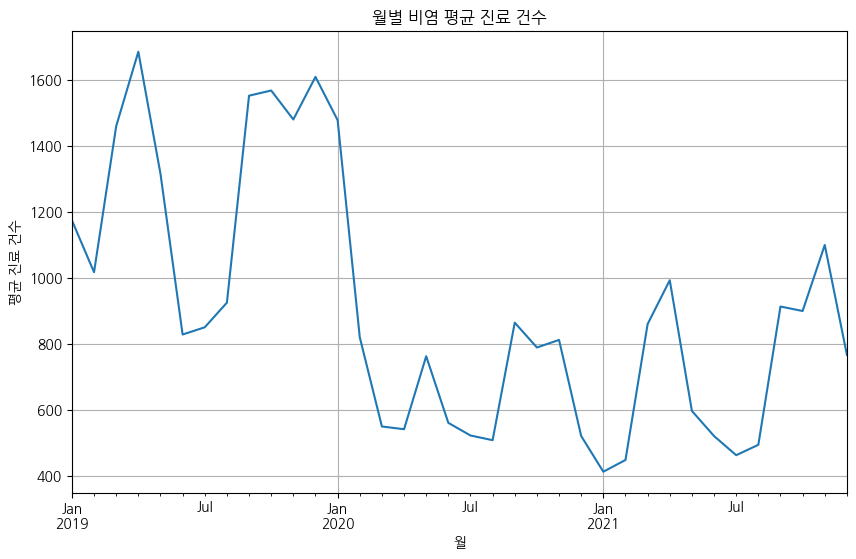

In [ ]:
# 월별 평균 진료 건수 그래프
## 천식과 비염, 진료건수의 차이는 크지만, 그래프 추이는 비슷함

month_avg.plot(kind='line', figsize=(10, 6))
plt.title('월별 비염 평균 진료 건수')
plt.xlabel('월')
plt.ylabel('평균 진료 건수')
plt.grid(True)
plt.show()

In [ ]:
merged_df.head()

,연도,미세먼지 평균 농도,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2019,41.705,2019-01-01,종로구,남자,1. 0-5세,120
1,2019,41.705,2019-01-01,종로구,남자,2. 6-11세,157
2,2019,41.705,2019-01-01,종로구,남자,3. 12-17세,128
3,2019,41.705,2019-01-01,종로구,남자,4. 18-44세,780
4,2019,41.705,2019-01-01,종로구,남자,5. 45-64세,703


## 월별 미세먼지 농도와 비염 진료건수

## 월별 미세먼지, 진료건수 플롯

In [ ]:
# 월별 진료 건수 집계
monthly_medical = merged_df.groupby(pd.Grouper(key='요양개시연월', freq='M'))['진료에피소드 건수'].sum().reset_index()

# 월별 평균 미세먼지 농도 집계
monthly_dust_avg = df_dust_month.groupby('월')['미세먼지 농도'].mean().reset_index()

<ipython-input-62-bca79791a389>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_medical = merged_df.groupby(pd.Grouper(key='요양개시연월', freq='M'))['진료에피소드 건수'].sum().reset_index()


In [ ]:
# monthly_medical 의 '요양개시연월' 열을 '월'로 변환
monthly_medical['월'] = monthly_medical['요양개시연월'].dt.strftime('%Y.%m 월')

# 두 데이터프레임 병합
merged_monthly_data = pd.merge(monthly_medical, monthly_dust_avg, on='월', how='left')
merged_monthly_data

,요양개시연월,진료에피소드 건수,월,미세먼지 농도
0,2019-01-31,352205,2019.01 월,65.8
1,2019-02-28,305013,2019.02 월,57.0
2,2019-03-31,437810,2019.03 월,69.16
3,2019-04-30,505568,2019.04 월,40.84
4,2019-05-31,394541,2019.05 월,52.48
5,2019-06-30,248340,2019.06 월,28.64
6,2019-07-31,254916,2019.07 월,25.64
7,2019-08-31,277316,2019.08 월,24.76
8,2019-09-30,465579,2019.09 월,21.26
9,2019-10-31,470284,2019.10 월,32.88


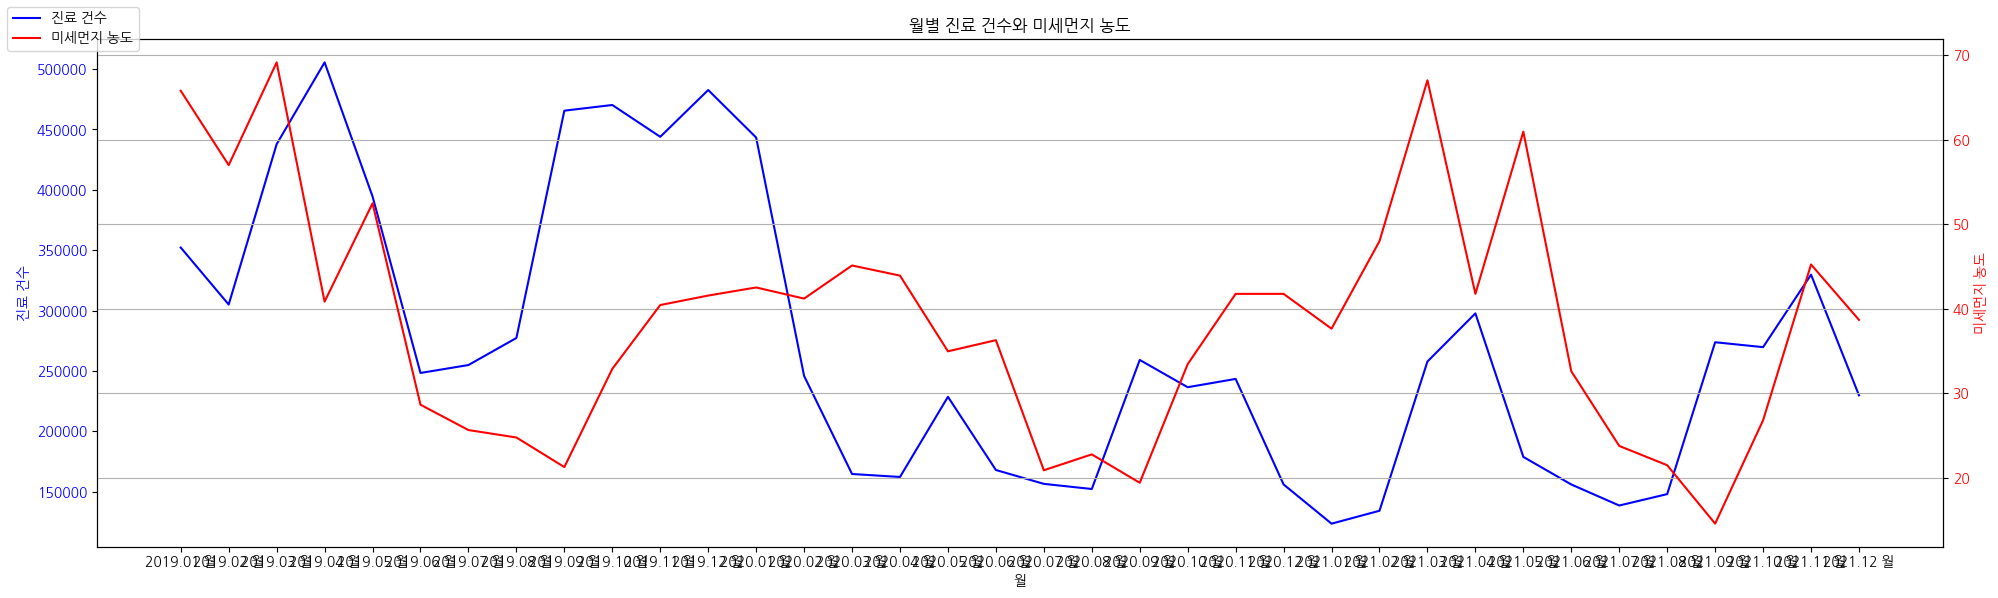

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 6))

# 진료 건수 (왼쪽 y축)
ax1.plot(merged_monthly_data['월'], merged_monthly_data['진료에피소드 건수'], color='blue', label='진료 건수')
ax1.set_xlabel('월')
ax1.set_ylabel('진료 건수', color='blue')
ax1.tick_params('y', labelcolor='blue')

# 미세먼지 농도 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(merged_monthly_data['월'], merged_monthly_data['미세먼지 농도'], color='red', label='미세먼지 농도')
ax2.set_ylabel('미세먼지 농도', color='red')
ax2.tick_params('y', labelcolor='red')

# x축 눈금 회전
plt.xticks(rotation=90)

# 범례 표시
fig.legend(loc='upper left')

plt.title('월별 진료 건수와 미세먼지 농도')
plt.grid(True)
plt.tight_layout()
plt.show()
# 미세먼지가 높을때 진료 건수가 많아진다는 사실을 확인할 수 있다.
# 하지만, 미세먼지 농도가 낮을 때도 진료 건수가 많은 경우도 있음.


## 월별 미세먼지 농도, 비염 진료건수 산점도

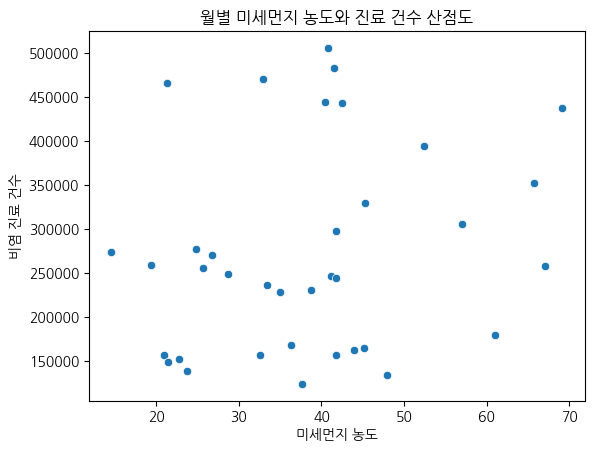

In [ ]:
sns.scatterplot(x='미세먼지 농도', y='진료에피소드 건수', data=merged_monthly_data)
plt.title('월별 미세먼지 농도와 진료 건수 산점도')
plt.xlabel('미세먼지 농도')
plt.ylabel('비염 진료 건수')
plt.show()

## 월별 비염,진료건수 Bar 차트

In [ ]:
# 미세먼지 평균 농도로 정리한 데이터와 비염 진료 건수를 merge 해보자
df_human['연도'] = pd.to_datetime(df_human['요양개시연월']).dt.year
merged_df = pd.merge(df_dust_finalmonth, df_human, left_on='연도', right_on='연도', how='left')
merged_df.head()

,연도,미세먼지 평균 농도,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2019,41.705,2019-01-01,종로구,남자,1. 0-5세,120
1,2019,41.705,2019-01-01,종로구,남자,2. 6-11세,157
2,2019,41.705,2019-01-01,종로구,남자,3. 12-17세,128
3,2019,41.705,2019-01-01,종로구,남자,4. 18-44세,780
4,2019,41.705,2019-01-01,종로구,남자,5. 45-64세,703


In [ ]:
# 주소와 진료 건수 그룹화
tmp = merged_df.groupby("주소(시군구)")["진료에피소드 건수"].sum()
tmp = tmp.reset_index()
tmp

,주소(시군구),진료에피소드 건수
0,강남구,515872
1,강동구,474972
2,강북구,309058
3,강서구,600646
4,관악구,480482
5,광진구,331909
6,구로구,451854
7,금천구,225832
8,노원구,556637
9,도봉구,315177


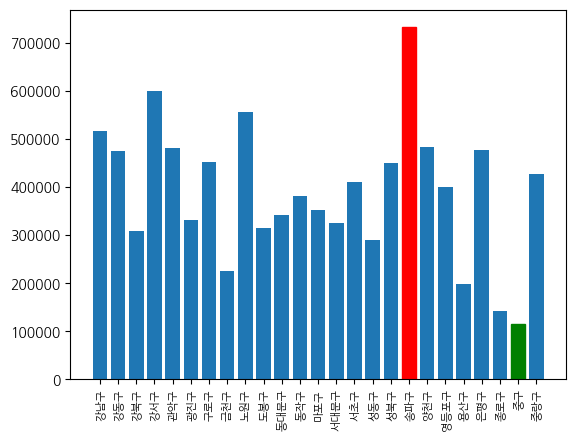

In [ ]:
# 주소와 진료건수 차트 > 송파구가  비염 진료건수가 가장 많고 중구가 가장 적음

ax_params = {
    "x": tmp["주소(시군구)"],
    "height": tmp["진료에피소드 건수"],

}

fig, ax = plt.subplots()
bars = ax.bar(**ax_params)

# 진료 건수 값 최대/최소 인덱스 찾기
heights = tmp["진료에피소드 건수"].values
max_idx = np.argmax(heights)
min_idx = np.argmin(heights)

# 최대/최소 값에 해당하는 bar의 색상 변경
bars[max_idx].set_color('red')
bars[min_idx].set_color('green')

# x축 글자 크기 조절 및 회전
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [ ]:
df_rhinitis.head()

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2019-01-01,종로구,남자,1. 0-5세,120
1,2019-01-01,종로구,남자,2. 6-11세,157
2,2019-01-01,종로구,남자,3. 12-17세,128
3,2019-01-01,종로구,남자,4. 18-44세,780
4,2019-01-01,종로구,남자,5. 45-64세,703


## 연월별 비염 진료건수

In [ ]:
df_rhinitis['year'] = df_rhinitis['요양개시연월'].dt.year
episode_count_by_year = df_rhinitis.groupby('year')['진료에피소드 건수'].sum().reset_index()
episode_count_by_year

<ipython-input-70-18e592c1bbca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rhinitis['year'] = df_rhinitis['요양개시연월'].dt.year


,year,진료에피소드 건수
0,2019,4638201
1,2020,2616463
2,2021,2537708


## 연월별 비염 진료건수

In [ ]:
df_rhinitis['year_month'] = df_rhinitis['요양개시연월'].dt.to_period('M')
episode_count_by_month = df_rhinitis.groupby('year_month')['진료에피소드 건수'].sum().reset_index()
episode_count_by_month

<ipython-input-71-f2311c9b870b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rhinitis['year_month'] = df_rhinitis['요양개시연월'].dt.to_period('M')


,year_month,진료에피소드 건수
0,2019-01,352205
1,2019-02,305013
2,2019-03,437810
3,2019-04,505568
4,2019-05,394541
5,2019-06,248340
6,2019-07,254916
7,2019-08,277316
8,2019-09,465579
9,2019-10,470284


## 연월별 비염&천식건수 merge

#csv 파일 다운로드 방법

In [ ]:
episode_count_by_month.to_csv('episode_count_by_month.csv', index=False)
print("CSV 파일 저장")

from google.colab import files
files.download('/content/episode_count_by_month.csv')

CSV 파일 저장


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## 대시보드

### 먼지
#### 연월별 먼지 변화량 (hue : 구별)

### 천식(진료건수)
#### 연별 천식 /월별 천식 / 구별 전체 천식 건수
#### 미세먼지와 천식 상관관계
#### 미세먼지 천식 성별

### 비염도 천식과 마찬가지